# Machine Learning Project - US Gun Crime

## Project Aims
- Create a model that could be used to accurately predict the likelihood of gun fire activity based on crime type and time related data



## Potential Uses
- Could act as an early warning system for law enforcement to identify potentially life endangering emergency response events and allow for the employment of resources to help minimise shooting activity in future
- Would need to be applied carefully, so that it was not used to purely justify the use of armed response teams, which could reinforce existing patterns of gun related activity

## The Data
- Drawn from Kaggle. 
- 7 files (18 features in each) detailing police-recorded crime activity over years 2015-22 in Chicago. 
- An offense codes .csv file was also provided, that included 3 features to allow cross-referencing of offense codes with offense details   
- 603,307 incident records

## Data Processing
- Imported data files and merged together (using OFFENSE_CODE as the key) to create a full dataset
- Removed 6 features due to their likely correlation with other features (OFFENSE_CODE, OFFENSE_NAME, OFFENSE_CODE_GROUP,  OFFENSE_DESCRIPTION, DISTRICT, OCCURRED_ON_DATE) and 6 further features as the geographical focus of the data fell outside the parameters of this study (UCR_PART, REPORTING_AREA, STREET, Lat, Long, Location).
- On inspecting the null values, it became apparent that the data in the OFFENSE_DESCRIPTION feature that I was intending to use as a key IV, was corrupted, with data in certain columns having been shifted to the right for hundreds of thousands of rows. The OFFENSE_DESCRIPTION categories also ran to over 500 categories which was likely to cause issues when applying ML models, as one hot encoding would create vast swathes of 0 values.  
- To rectify this, I created a new feature in the initial offense codes file, using my domain knowledge to classify the crimes into 30-40 categories. I then re-merged the files (again indexed on OFFENSE_CODE). This created a new, more practicable feature into the available dataset.
- Removed remaining null values
- I replaced non-integer values in the SHOOTING feature to be 0 or 1, as this was to be my target variable.
- I checked for imbalances in the target variable - Approx 1:100 in initial view (this changed post data processing - 1:72)
- Imbalance within the target variable (SHOOTING) and a wish for this classification model to apply to all settings, meant that I chose not to exclude any data points on the basis of being outliers.
- Feature Engineering: DAY_OF_WEEK was categorically encoded (ie. Monday = 1, Tuesday = 2 etc) and CRIME_TYPE was one hot encoded
- After processing, there were a total of 42 features and 519,560 records to be processed by the chosen algorithms

## Pre-Processing
- I defined the variables with SHOOTING acting as my Y variable and all other features (41) acting as X variables
- I split the data using train test split
- I scaled the data to make it consistent in size, using StandardScalar to maintain the existing mean and SD profile. This was done after splitting, to reduce data leakage from train to test set 

## ML Processing - A/B Baselining
- I employed logistic regression with mostly default settings as a baseline model to enable A/B testing. I did have to amend the max_iter  hyper-parameter from the default setting of 100 to 200 for the model to converge.
- I then amended hyper-parameters to adjust for class imbalance using the class_weight='balanced' and class_weight={0:1, 1:72} to compare outcomes.
- The key metric used to judge performance was the AUC-ROC score, due to the holistic nature of it's ability to effectively measure the trade off between Type 1 and Type 2 errors. 
- logreg0 - Baseline (default settings)
- logreg1 - Balanced class weight (max_iter=200, class_weight = 'balanced')
- logreg2 - Precisely balanced class weight (max_iter=200, class_weight={0:1, 1:72})

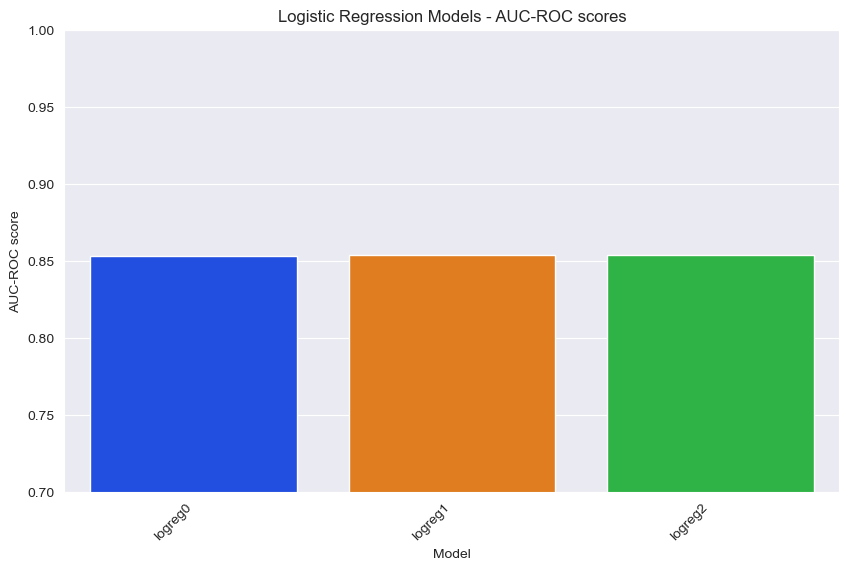

## ML Processing - Baselining a variety of models
- I applied a number of models "out of the box" using their default settings to cross compare
- I used DecisionTreeClassifier (dt0), RandomForestClassifier (rf0), SVC (Support Vector Classifier)(svc0), XGBClassifier (xgbc0) and MLPClassifier (mlpc0) in this order, to see if the relative increase in the complexity of the models would result in increased ROC/AUC scores.

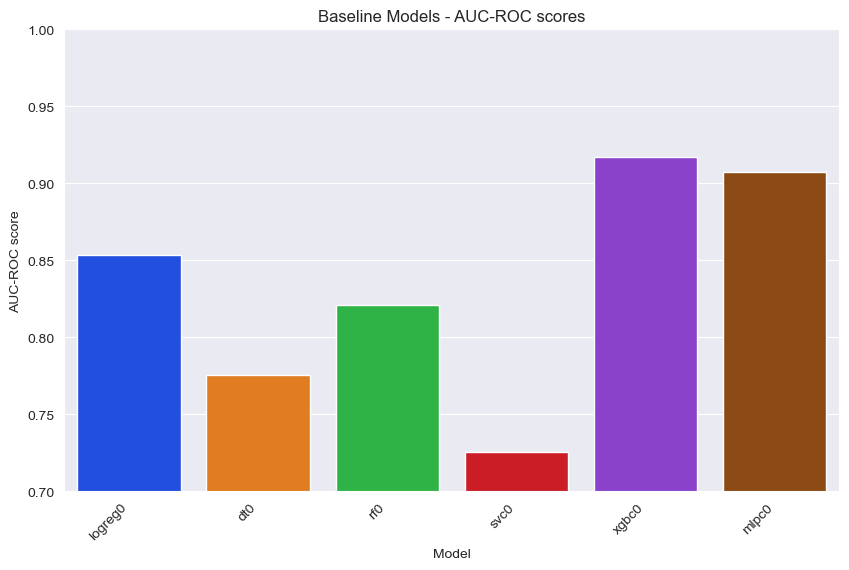

## ML Processing - Further investigation of promising models (XG Boost)
- I carried out investigations into the effect of changing the class weightings and amending hyperparameters, which both delivered some small improvements to the model performance
- xgbc0 - Default settings
- xgbc1 - Adjusted class weighting to investigate effect (scale_pos_weight=72)
- xgbc2 - Amended hyperparameters to investigate effect of slowing down the learning rate, increasing tree depth and increasing the number of trees being utilised (learning_rate=0.1, max_depth=8, n_estimators=200)

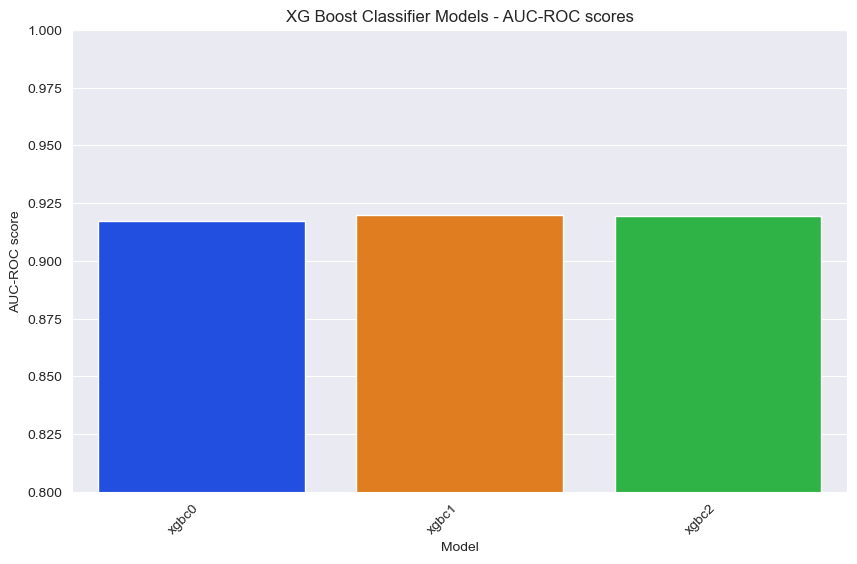



## ML Processing - Further investigation of promising models (Multi Level Perceptron)
- I carried out investigations into MLP with limited success - increasing hidden layers was the only change that delivered any improvements in performance
- mlpc0 - Default settings (max_iter=100, hidden_layer_sizes=(4,), activation='logistic')
- mlpc1 - Increased hidden layers (max_iter=100, hidden_layer_sizes=(10,10), activation='logistic')
- mlpc2 - Changed logistic to relu ((max_iter=100, hidden_layer_sizes=(4,), activation='relu')
- mlpc3 - Increased iterations vs default (max_iter=200, hidden_layer_sizes=(4,), activation='logistic')
- mlpc4 - Increased iterations and hidden layers vs default (max_iter=200, hidden_layer_sizes=(10,10), activation='logistic')

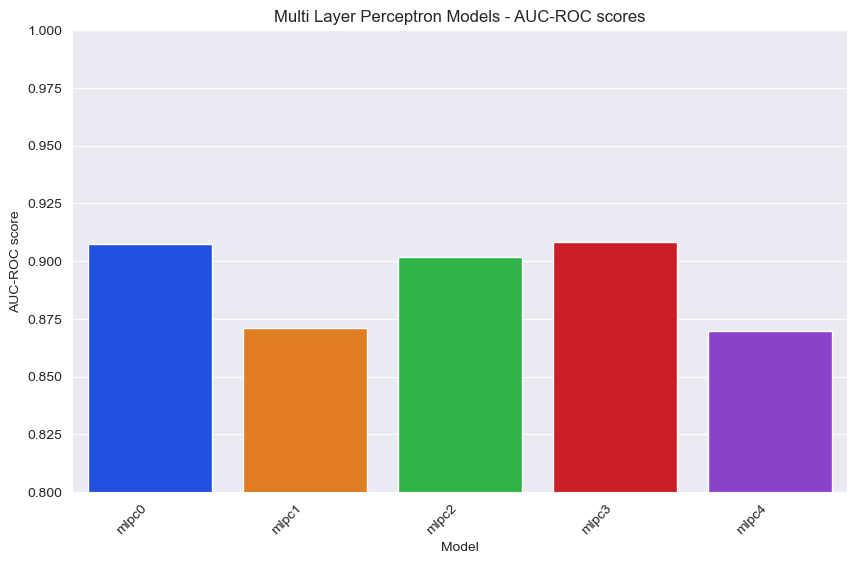



## ML Processing - Application of upscaling
- Applied upscaling of Y variable to address class imbalance
- Applied SMOTE, then re-split the data and re-standardised



## ML Processing - Application of promising models post-SMOTE (XG Boost and MLP)
- I applied all of the same experimentation to the dataset post-upscaling, which delivered significant improvements to model performance across both models, although XG Boost came out as the bets performing model overall.
- xgbcsmote0 - Default settings post SMOTE
- xgbcsmote1 - Amended hyperparameters as per prior investigation to view the effect of slowing down the learning rate, increasing tree depth and increasing the number of trees being utilised after applying SMOTE (learning_rate=0.1, max_depth=8, n_estimators=200)
- mlpcsmote0 - Default settings post SMOTE
- mlpcsmote1 - Increased hidden layers post SMOTE (max_iter=100, hidden_layer_sizes=(10,10), activation='logistic')
- mlpcsmote2 - Changed logistic to relu post SMOTE (max_iter=100, hidden_layer_sizes=(4,), activation='relu')
- mlpcsmote3 - Increased iterations vs default post SMOTE (max_iter=200, hidden_layer_sizes=(4,), activation='logistic')
- mlpcsmote4 - Increased iterations and hidden layers vs default post SMOTE (max_iter=200, hidden_layer_sizes=(10,10), activation='logistic')

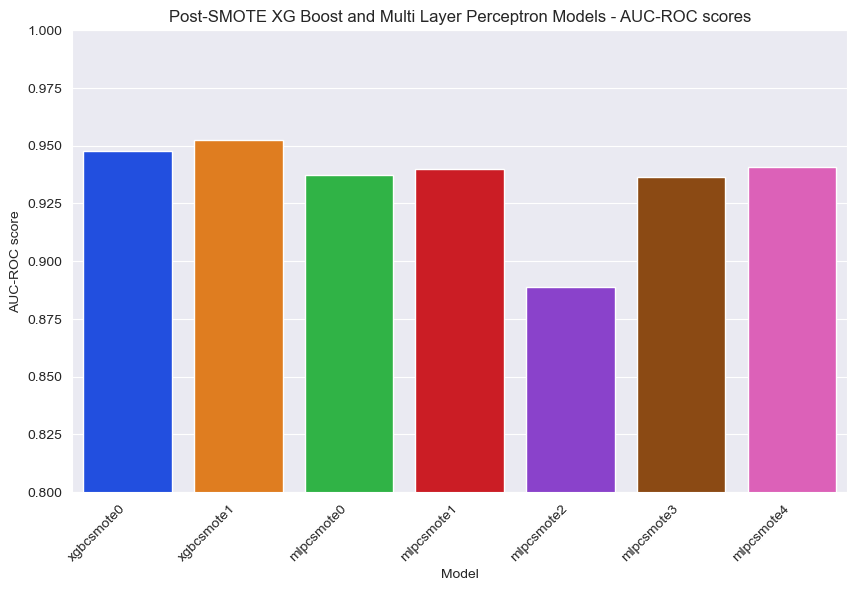

## ML Processing - Applied Grid Search to the most promising model identified (XG Boost)
- Applied Gridsearch using a variety of combinations of the most commonly used hyper-parameters, being informed by the results of previous experimentation ('max_depth':[4,5,6,7,8,9,10], 'learning_rate':[0.01,0.025,0.05,0.1,0.2,0.3,0.5,0.7,0.9],'n_estimators':[50,100,150,200,250,300])
- Returned the preferred hyper-parameters of {'learning_rate': 0.9, 'max_depth': 10, 'n_estimators': 300} after 36 hours of processing!

## ML Processing - Used tailored hyperparameters with XG Boost (post SMOTE)
- xgbcsmote2 - Amended hyperparameters as per Grid Search {'learning_rate': 0.9, 'max_depth': 10, 'n_estimators': 300}
- This delivered a significant improvement in performance, and is therefore presented as the preferred model, with an AUC-ROC score of 0.9871228323138931

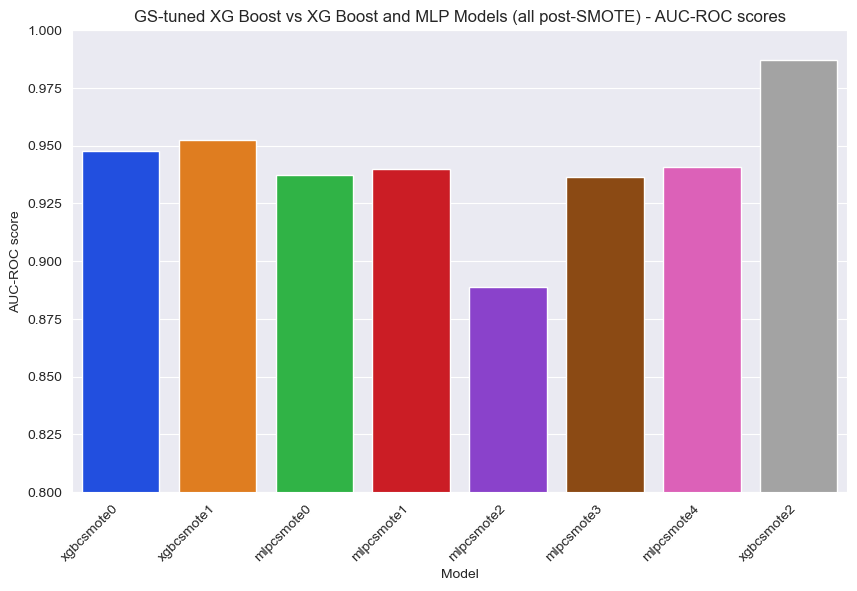

## Further Performance Measures
- 96% accuracy score
- 97% precision score
- 96% recall score
- 96% F1 score

## Feature Importance
- Top 12 key contributing factors to the predictive model

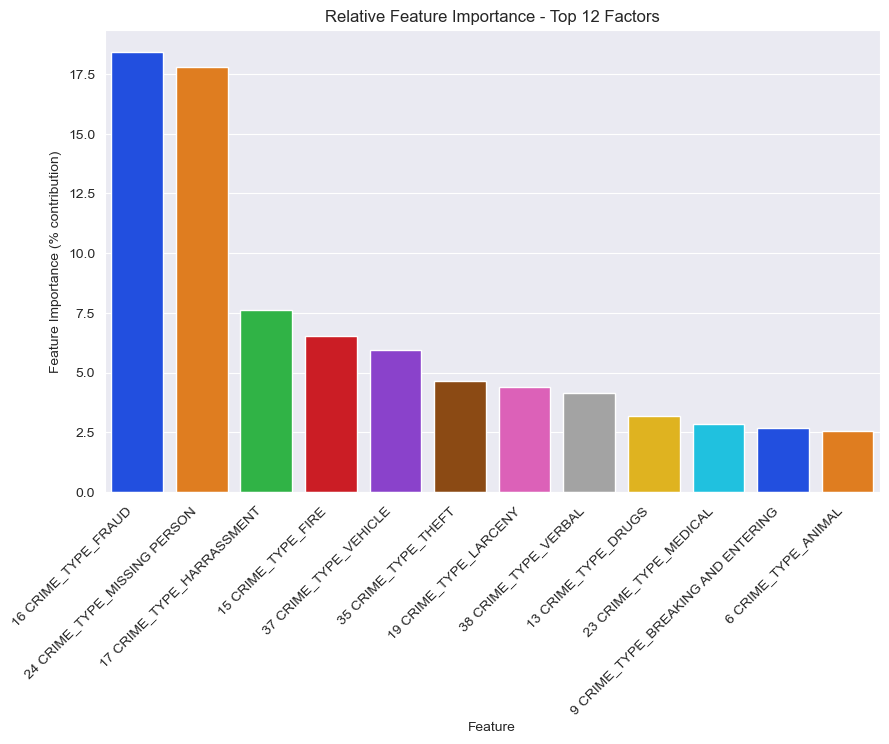

# Data Processing

## Import libraries and dataset

In [1]:
# Import libraries and relevant files
# Encoding specified to deal with unexpected characters
# Low-memory set to deal with mixed data types in column 0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
b2016 = pd.read_csv('2016.csv', encoding = 'ISO-8859-1')
b2017 = pd.read_csv('2017.csv', encoding = 'ISO-8859-1')
b2018 = pd.read_csv('2018.csv', encoding = 'ISO-8859-1')
b2019 = pd.read_csv('2019.csv', encoding = 'ISO-8859-1', low_memory=False)
b2020 = pd.read_csv('2020.csv', encoding = 'ISO-8859-1', low_memory=False)
b2021 = pd.read_csv('2021.csv', encoding = 'ISO-8859-1', low_memory=False)
b2022 = pd.read_csv('2022.csv', encoding = 'ISO-8859-1', low_memory=False)
off_codes = pd.read_csv('offense_codes3.csv', encoding = 'ISO-8859-1')

In [2]:
# Concatenate multiple files into a single CSV

df_full = pd.concat([b2016, b2017, b2018, b2019, b2020, b2021, b2022], join='inner')

In [3]:
# Merge off_codes CSV with df_full indexing on OFFENSE_CODE

off_codes = off_codes.rename(columns={'CODE':'OFFENSE_CODE', 'NAME':'OFFENSE_NAME', 'CRIME_TYPE': 'CRIME_TYPE'})
df_full = df_full.merge(off_codes, on='OFFENSE_CODE', how='left')
df_full.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location',
       'OFFENSE_NAME', 'CRIME_TYPE'],
      dtype='object')

## Inspect the data
- Look at column headings - are they standardised?
- Identify potential dependent variables
- Identify how the data is aggregated (ie. what does each row refer to?)

In [4]:
# Inspecting the data

df_full.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME,CRIME_TYPE
0,1107,Fraud,FRAUD - IMPERSONATION,C11,352,NaN,2016-01-01 00:00:00,2016,1,Friday,0,Part Two,DITSON ST,42.301085,-71.063908,"(42.30108481, -71.06390782)",FRAUD - IMPERSONATION,FRAUD
1,1107,Fraud,FRAUD - IMPERSONATION,C11,352,NaN,2016-01-01 00:00:00,2016,1,Friday,0,Part Two,DITSON ST,42.301085,-71.063908,"(42.30108481, -71.06390782)",FRAUD - LARCENY BY SCHEME,FRAUD
2,2629,Harassment,HARASSMENT,D4,161,NaN,2016-01-01 00:00:00,2016,1,Friday,0,Part Two,TREMONT ST,42.347017,-71.068862,"(42.34701666, -71.06886238)",HARASSMENT,VERBAL
3,1201,Embezzlement,EMBEZZLEMENT,A1,122,NaN,2016-01-01 00:00:00,2016,1,Friday,0,Part Two,WASHINGTON ST,42.350005,-71.063591,"(42.35000492, -71.06359053)",EMBEZZLEMENT,FRAUD
4,1201,Embezzlement,EMBEZZLEMENT,A1,122,NaN,2016-01-01 00:00:00,2016,1,Friday,0,Part Two,WASHINGTON ST,42.350005,-71.063591,"(42.35000492, -71.06359053)",EMBEZZLEMENT,FRAUD


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074976 entries, 0 to 1074975
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   OFFENSE_CODE         1074976 non-null  int64  
 1   OFFENSE_CODE_GROUP   543232 non-null   object 
 2   OFFENSE_DESCRIPTION  1074976 non-null  object 
 3   DISTRICT             1067931 non-null  object 
 4   REPORTING_AREA       1074976 non-null  object 
 5   SHOOTING             534083 non-null   object 
 6   OCCURRED_ON_DATE     1074976 non-null  object 
 7   YEAR                 1074976 non-null  int64  
 8   MONTH                1074976 non-null  int64  
 9   DAY_OF_WEEK          1074976 non-null  object 
 10  HOUR                 1074976 non-null  int64  
 11  UCR_PART             543134 non-null   object 
 12  STREET               1057913 non-null  object 
 13  Lat                  1019730 non-null  float64
 14  Long                 1019730 non-null  float64
 15

In [6]:
# Inspecting the offense code group - there are many gaps in this column, which is why I have gone back to the original 
# off_codes CSV, using domain knowledge to create a new column of CRIME_TYPE that will reference more effectively with OFFENSE_CODE 

print (df_full['OFFENSE_CODE_GROUP'].value_counts())

Larceny                                      47742
Medical Assistance                           45051
Investigate Person                           35816
Motor Vehicle Accident Response              35237
Other                                        30195
                                             ...  
Gambling                                         6
INVESTIGATE PERSON                               6
Biological Threat                                4
Burglary - No Property Taken                     3
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64


In [7]:
# Promising column for analysis, however there are multiple missing values (especially when further filtered in combination with SHOOTING)
df_full['OFFENSE_CODE_GROUP'].value_counts()

Larceny                                      47742
Medical Assistance                           45051
Investigate Person                           35816
Motor Vehicle Accident Response              35237
Other                                        30195
                                             ...  
Gambling                                         6
INVESTIGATE PERSON                               6
Biological Threat                                4
Burglary - No Property Taken                     3
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [8]:
# Promising column for analysis, however there are multiple missing values (especially when further filtered in combination with SHOOTING)
df_full['OFFENSE_DESCRIPTION'].value_counts()

INVESTIGATE PERSON                               87354
SICK/INJURED/MEDICAL - PERSON                    60730
VANDALISM                                        53856
INVESTIGATE PROPERTY                             50124
TOWED MOTOR VEHICLE                              45990
                                                 ...  
Migrated Report - Embezzlement                       1
DRUGS - POSS CLASS E INTENT TO MF DIST DISP          1
Evidence Tracker Incidents                           1
MANSLAUGHTER - NEGLIGENCE                            1
Migrated Report - Injured/Medical/Sick Assist        1
Name: OFFENSE_DESCRIPTION, Length: 282, dtype: int64

In [9]:
# Some issues - Object data type, as well as including Y values
df_full['SHOOTING'].value_counts()

0    524653
1      7091
Y      2339
Name: SHOOTING, dtype: int64

In [10]:
# Potentially useful column, however no key is available to make sense of the coding, 
# so this data will not be included as part of this analysis
df_full['DISTRICT'].value_counts()

B2          160269
D4          140855
C11         139539
A1          121345
B3          119308
C6           80926
D14          70866
E18          59719
E13          59577
E5           47141
A7           45406
A15          22055
External       925
Name: DISTRICT, dtype: int64

In [11]:
'''
ACTIONS

## Removal of columns

- OFFENSE_CODE, OFFENSE_NAME, OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION (correlated with CRIME_TYPE)
- DISTRICT (correlated with REPORTING_AREA)
- OCCURRED_ON_DATE (timestamp data that is correlated with other time-related data)
- UCR_PART (No insight attainable)
- REPORTING_AREA - No key available to alloow for insight from this feature
- STREET, Lat, Long, Location (geographical data falls outside the parameters of the purpose of this study)

## Investigation of Null Values

- Replace Y values with 1 in SHOOTING
- Decide whether to impute or delete

## Investigate Value Counts

- Check for imbalances in target variable - Approx 1:100 in initial view (this changed post data processing - 1:72)
- Check for spelling inconsistencies and make changes - nothing significant identified

## Investigate Outliers

- Imbalance within target variable (SHOOTING), means that it has been decided not to exclude any data points 

## Feature Engineering

- DAY_OF_WEEK to be categorically encoded (ie. Monday = 1, Tuesday = 2 etc)
- CRIME_TYPE to be one hot encoded

'''

'\nACTIONS\n\n## Removal of columns\n\n- OFFENSE_CODE, OFFENSE_NAME, OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION (correlated with CRIME_TYPE)\n- DISTRICT (correlated with REPORTING_AREA)\n- OCCURRED_ON_DATE (timestamp data that is correlated with other time-related data)\n- UCR_PART (No insight attainable)\n- REPORTING_AREA - No key available to alloow for insight from this feature\n- STREET, Lat, Long, Location (geographical data falls outside the parameters of the purpose of this study)\n\n## Investigation of Null Values\n\n- Replace Y values with 1 in SHOOTING\n- Decide whether to impute or delete\n\n## Investigate Value Counts\n\n- Check for imbalances in target variable - Approx 1:100 in initial view (this changed post data processing - 1:72)\n- Check for spelling inconsistencies and make changes - nothing significant identified\n\n## Investigate Outliers\n\n- Imbalance within target variable (SHOOTING), means that it has been decided not to exclude any data points \n\n## Feature E

## Remove unneccessary columns

In [12]:
df_full = df_full.drop(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'OCCURRED_ON_DATE', 
                    'UCR_PART', 'STREET', 'Lat', 'Long', 'Location','OFFENSE_NAME', 'REPORTING_AREA'], axis=1)
df_full.head()

,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,CRIME_TYPE
0,NaN,2016,1,Friday,0,FRAUD
1,NaN,2016,1,Friday,0,FRAUD
2,NaN,2016,1,Friday,0,VERBAL
3,NaN,2016,1,Friday,0,FRAUD
4,NaN,2016,1,Friday,0,FRAUD


## Investigation of Null Values

In [13]:
df_full.isnull().sum()

SHOOTING       540893
YEAR                0
MONTH               0
DAY_OF_WEEK         0
HOUR                0
CRIME_TYPE      12184
dtype: int64

In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074976 entries, 0 to 1074975
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   SHOOTING     534083 non-null   object
 1   YEAR         1074976 non-null  int64 
 2   MONTH        1074976 non-null  int64 
 3   DAY_OF_WEEK  1074976 non-null  object
 4   HOUR         1074976 non-null  int64 
 5   CRIME_TYPE   1062792 non-null  object
dtypes: int64(3), object(3)
memory usage: 57.4+ MB


In [15]:
# Amend non-binary Y value from target variable category
df_full['SHOOTING'] = df_full['SHOOTING'].replace({'Y': '1'})

In [16]:
# Many non-binary values (over 400,000) for 'SHOOTING' that are not showing up as null values. 
# This is due to some corruption in the formatting of columns within the CSV files
# All other entries other than 1s and 0s have been filtered out below

df_ones = df_full.loc[(df_full['SHOOTING'] == 1)]
df_zeroes = df_full.loc[(df_full['SHOOTING'] == 0)]
df_clean = pd.concat([df_zeroes, df_ones], join='inner')
df_clean

,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,CRIME_TYPE
543232,0,2019,1,Tuesday,0,PROPERTY
543233,0,2019,1,Tuesday,0,PROPERTY
543234,0,2019,1,Tuesday,0,PROPERTY
543235,0,2019,1,Tuesday,0,PROPERTY
543236,0,2019,1,Tuesday,0,VERBAL
...,...,...,...,...,...,...
1074638,1,2022,12,Friday,23,PROPERTY
1074691,1,2022,12,Saturday,1,SEARCH
1074692,1,2022,12,Saturday,1,SEARCH
1074949,1,2022,12,Saturday,22,SEARCH


In [17]:
# Checking totals
df_clean['SHOOTING'].value_counts()

0    524653
1      7091
Name: SHOOTING, dtype: int64

In [18]:
# Checking reduction of dataset - 0 and 1 values now mnake up the total number of entries
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531744 entries, 543232 to 1074950
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   SHOOTING     531744 non-null  object
 1   YEAR         531744 non-null  int64 
 2   MONTH        531744 non-null  int64 
 3   DAY_OF_WEEK  531744 non-null  object
 4   HOUR         531744 non-null  int64 
 5   CRIME_TYPE   519560 non-null  object
dtypes: int64(3), object(3)
memory usage: 28.4+ MB


In [19]:
# Visual inspection of 'CRIME TYPE'
df_clean['CRIME_TYPE'].value_counts()

VEHICLE                  91937
PROPERTY                 75674
SEARCH                   66654
ASSAULT                  48855
THEFT                    40548
LARCENY                  36840
MEDICAL                  27536
VERBAL                   27456
FRAUD                    21301
DRUGS                    17691
MISSING PERSON           13256
HARRASSMENT               7418
BREAKING AND ENTERING     6659
WEAPON                    6334
DEATH                     5366
BURGLARY                  5161
OTHER                     3969
FIRE                      3908
VIOLATION OF ORDER        3545
ROBBERY                   3130
ANIMAL                    1512
WARRANT                    912
EXTORTION                  724
ALCOHOL                    674
LIQUOR                     674
SUICIDE                    404
PRISONER                   368
DISTURBANCE                342
MANSLAUGHTER/MURDER        301
PROSTITUTION               148
PROTEST                    126
KIDNAPPING                  81
OBSCENIT

In [20]:
# Drop the remainder na values to clean 'CRIME TYPE' feature
df_clean.dropna(inplace= True)


In [21]:
# Confirm successful drop of na values
df_clean.isna().sum()

SHOOTING       0
YEAR           0
MONTH          0
DAY_OF_WEEK    0
HOUR           0
CRIME_TYPE     0
dtype: int64

In [22]:
# One hot encoding of 'CRIME TYPE' feature
pd.get_dummies(df_clean['CRIME_TYPE'], prefix='CRIME_TYPE')
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['CRIME_TYPE'], prefix='CRIME_TYPE')], axis=1)
df_clean.drop('CRIME_TYPE', axis=1, inplace=True)

df_clean

,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,CRIME_TYPE_ALCOHOL,CRIME_TYPE_ANIMAL,CRIME_TYPE_ASSAULT,CRIME_TYPE_ATTEMPT,CRIME_TYPE_BREAKING AND ENTERING,...,CRIME_TYPE_ROBBERY,CRIME_TYPE_SEARCH,CRIME_TYPE_SUICIDE,CRIME_TYPE_THEFT,CRIME_TYPE_TRUANCY,CRIME_TYPE_VEHICLE,CRIME_TYPE_VERBAL,CRIME_TYPE_VIOLATION OF ORDER,CRIME_TYPE_WARRANT,CRIME_TYPE_WEAPON
543232,0,2019,1,Tuesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543233,0,2019,1,Tuesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543234,0,2019,1,Tuesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543235,0,2019,1,Tuesday,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543236,0,2019,1,Tuesday,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074638,1,2022,12,Friday,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074691,1,2022,12,Saturday,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1074692,1,2022,12,Saturday,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1074949,1,2022,12,Saturday,22,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# Categorical encoding of 'DAY OF THE WEEK' feature
df_clean['DAY_OF_WEEK'] = df_clean['DAY_OF_WEEK'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5
                                                        , 'Saturday': 6, 'Sunday': 7})
df_clean

,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,CRIME_TYPE_ALCOHOL,CRIME_TYPE_ANIMAL,CRIME_TYPE_ASSAULT,CRIME_TYPE_ATTEMPT,CRIME_TYPE_BREAKING AND ENTERING,...,CRIME_TYPE_ROBBERY,CRIME_TYPE_SEARCH,CRIME_TYPE_SUICIDE,CRIME_TYPE_THEFT,CRIME_TYPE_TRUANCY,CRIME_TYPE_VEHICLE,CRIME_TYPE_VERBAL,CRIME_TYPE_VIOLATION OF ORDER,CRIME_TYPE_WARRANT,CRIME_TYPE_WEAPON
543232,0,2019,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543233,0,2019,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543234,0,2019,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543235,0,2019,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543236,0,2019,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074638,1,2022,12,5,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1074691,1,2022,12,6,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1074692,1,2022,12,6,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1074949,1,2022,12,6,22,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
#Inspect clean columns - need to convery target variable to int

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519560 entries, 543232 to 1074950
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   SHOOTING                          519560 non-null  object
 1   YEAR                              519560 non-null  int64 
 2   MONTH                             519560 non-null  int64 
 3   DAY_OF_WEEK                       519560 non-null  int64 
 4   HOUR                              519560 non-null  int64 
 5   CRIME_TYPE_ALCOHOL                519560 non-null  uint8 
 6   CRIME_TYPE_ANIMAL                 519560 non-null  uint8 
 7   CRIME_TYPE_ASSAULT                519560 non-null  uint8 
 8   CRIME_TYPE_ATTEMPT                519560 non-null  uint8 
 9   CRIME_TYPE_BREAKING AND ENTERING  519560 non-null  uint8 
 10  CRIME_TYPE_BURGLARY               519560 non-null  uint8 
 11  CRIME_TYPE_DEATH                  519560 non-null  uint8 
 

# Pre-Processing

In [25]:
# Define independent variables
X = df_clean.drop(['SHOOTING'], axis=1)

# Define target variable and convert to integer
y = df_clean['SHOOTING'].astype('int')

In [26]:
# Import train test split and apply
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardizing data pre-processing - Using StandardScalar to maintain mean and SD characterisation of the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ML Processing

## Logistic Regression - Baseline Model

In [28]:
# Train the model
# Max iterations increased from default (100) as default baseline model failed to converge
from sklearn.linear_model import LogisticRegression

logreg0 = LogisticRegression(max_iter=200)
logreg0.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [29]:
# Class imbalance within full dataset - Proportion of 0:1 is 72:1 (approx)
df_clean['SHOOTING'].value_counts()

0    512480
1      7080
Name: SHOOTING, dtype: int64

In [30]:
# Apply measures - classification report
# Seems to have trained very well on 0 scores, but less well on 1 scores - as you would expect with a strong class imbalance

from sklearn.metrics import classification_report

print(classification_report(y_test, logreg0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.63      0.03      0.06      1434

    accuracy                           0.99    103912
   macro avg       0.81      0.52      0.53    103912
weighted avg       0.98      0.99      0.98    103912



In [31]:
# Apply comibined measure to determine performance across all metrics - ROC/AUC score
# Limited effectiveness of model

from sklearn.metrics import roc_auc_score

ras_logreg0 = roc_auc_score(y_test, logreg0.predict_proba(X_test)[:, 1])
ras_logreg0

0.8537164441703621

## Logistic Regression- Balanced class weight

In [32]:
# Logistic Regression - Balanced class weight

logreg1 = LogisticRegression(max_iter=200, class_weight = 'balanced')
logreg1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=200)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77    102478
           1       0.03      0.97      0.07      1434

    accuracy                           0.63    103912
   macro avg       0.52      0.80      0.42    103912
weighted avg       0.99      0.63      0.76    103912



In [34]:
# Slightly better scores as balance has been adjusted for, but still major issues with class imbalance 

from sklearn.metrics import roc_auc_score

ras_logreg1 = roc_auc_score(y_test, logreg1.predict_proba(X_test)[:, 1])
ras_logreg1

0.8541981477236751

## Logistic Regression - Precisely balanced class weight

In [35]:
# Logistic Regression - Balanced class weight

logreg2 = LogisticRegression(max_iter=200, class_weight={0:1, 1:72})
logreg2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 72}, max_iter=200)

In [36]:
print(classification_report(y_test, logreg2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77    102478
           1       0.03      0.97      0.07      1434

    accuracy                           0.63    103912
   macro avg       0.52      0.80      0.42    103912
weighted avg       0.99      0.63      0.76    103912



In [37]:
# Tiny marginal improvement from previous iteration

ras_logreg2 = roc_auc_score(y_test, logreg2.predict_proba(X_test)[:, 1])
ras_logreg2

0.8541984335284618

## Decision Tree - Out of the box

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt0 = DecisionTreeClassifier()
dt0.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
print(classification_report(y_test, dt0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.56      0.19      0.28      1434

    accuracy                           0.99    103912
   macro avg       0.78      0.59      0.64    103912
weighted avg       0.98      0.99      0.98    103912



In [40]:
# Worse score than that gained using linear regression

ras_dt0 = roc_auc_score(y_test, dt0.predict_proba(X_test)[:, 1])
ras_dt0

0.7749851701340097

## Random Forests - Out of the box

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf0 = RandomForestClassifier()
rf0.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
print(classification_report(y_test, rf0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.56      0.20      0.29      1434

    accuracy                           0.99    103912
   macro avg       0.77      0.60      0.64    103912
weighted avg       0.98      0.99      0.98    103912



In [43]:
ras_rf0 = roc_auc_score(y_test, rf0.predict_proba(X_test)[:, 1])
ras_rf0

0.822181761337597

## Support Vector Machines - Out of the Box

In [44]:
# Blanked out here, as took over two hours to run - value hard coded instead, taken from previous iteration

#from sklearn.svm import SVC

In [45]:
#svc0 = SVC(probability=True)
#svc0.fit(X_train, y_train)

In [46]:
#print(classification_report(y_test, svc0.predict(X_test)))

In [47]:
#ras_svc0 = roc_auc_score(y_test, svc0.predict_proba(X_test)[:, 1])
ras_svc0 = 0.7256080483226757

## XG Boost - Out of the Box

In [48]:
! pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgbc0 = XGBClassifier()
xgbc0.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgbc0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.63      0.09      0.15      1434

    accuracy                           0.99    103912
   macro avg       0.81      0.54      0.57    103912
weighted avg       0.98      0.99      0.98    103912



In [52]:
# Best out of the box score of any of the algorithms

from sklearn.metrics import roc_auc_score

ras_xgbc0 = roc_auc_score(y_test, xgbc0.predict_proba(X_test)[:, 1])
ras_xgbc0

0.9173415232192028

## XG Boost - Class Weight Adjusted

In [53]:
xgbc1 = XGBClassifier(scale_pos_weight=72)
xgbc1.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
print(classification_report(y_test, xgbc1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    102478
           1       0.06      0.88      0.11      1434

    accuracy                           0.81    103912
   macro avg       0.53      0.84      0.50    103912
weighted avg       0.98      0.81      0.88    103912



In [55]:
# Small improvement vs baseline
ras_xgbc1 = roc_auc_score(y_test, xgbc1.predict_proba(X_test)[:, 1])
ras_xgbc1

0.9197124780709472

## XG Boost with amended hyperparameters

In [56]:
xgbc2 = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=200)
xgbc2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
print(classification_report(y_test, xgbc2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.70      0.10      0.17      1434

    accuracy                           0.99    103912
   macro avg       0.85      0.55      0.58    103912
weighted avg       0.98      0.99      0.98    103912



In [58]:
ras_xgbc2 = roc_auc_score(y_test, xgbc2.predict_proba(X_test)[:, 1])
ras_xgbc2

0.9194612692732118

## Multi Layer Perceptron Classifier - Out of the Box

In [59]:
from sklearn.neural_network import MLPClassifier

mlpc0 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(4,) 
                   , activation='logistic')

mlpc0.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), max_iter=100)

In [60]:
print(classification_report(y_test, mlpc0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.00      0.00      0.00      1434

    accuracy                           0.99    103912
   macro avg       0.49      0.50      0.50    103912
weighted avg       0.97      0.99      0.98    103912



C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
ras_mlpc0 = roc_auc_score(y_test, mlpc0.predict_proba(X_test)[:, 1])
ras_mlpc0

0.8697722357689155

## Multi Layer Perceptron Classifier - Increased hidden layers

In [62]:
mlpc1 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(10,10) 
                   , activation='logistic')

mlpc1.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10), max_iter=100)

In [63]:
print(classification_report(y_test, mlpc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.63      0.03      0.06      1434

    accuracy                           0.99    103912
   macro avg       0.81      0.52      0.53    103912
weighted avg       0.98      0.99      0.98    103912



In [64]:
ras_mlpc1 = roc_auc_score(y_test, mlpc1.predict_proba(X_test)[:, 1])
ras_mlpc1

0.8708892289239996

## Multi Layer Perceptron Classifier - Changed Logistic to Relu

In [65]:
mlpc2 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(4,) 
                   , activation='relu')

mlpc2.fit(X_train, y_train) # training

MLPClassifier(hidden_layer_sizes=(4,), max_iter=100)

In [66]:
print(classification_report(y_test, mlpc2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.64      0.02      0.04      1434

    accuracy                           0.99    103912
   macro avg       0.81      0.51      0.52    103912
weighted avg       0.98      0.99      0.98    103912



In [67]:
ras_mlpc2 = roc_auc_score(y_test, mlpc2.predict_proba(X_test)[:, 1])
ras_mlpc2

0.903492665146784

## Multi Layer Perceptron Classifier - Increased Iterations

In [68]:
mlpc3 = MLPClassifier(max_iter=200
                   , hidden_layer_sizes=(4,) 
                   , activation='logistic')

mlpc3.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,))

In [69]:
print(classification_report(y_test, mlpc3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.53      0.07      0.12      1434

    accuracy                           0.99    103912
   macro avg       0.76      0.53      0.56    103912
weighted avg       0.98      0.99      0.98    103912



In [70]:
ras_mlpc3 = roc_auc_score(y_test, mlpc3.predict_proba(X_test)[:, 1])
ras_mlpc3

0.9052743483698498

## Multi Layer Perceptron Classifier - Increased iterations and hidden layers

In [71]:
from sklearn.neural_network import MLPClassifier

mlpc4 = MLPClassifier(max_iter=200
                   , hidden_layer_sizes=(10,10) 
                   , activation='logistic')

mlpc4.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10))

In [72]:
print(classification_report(y_test, mlpc4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    102478
           1       0.00      0.00      0.00      1434

    accuracy                           0.99    103912
   macro avg       0.49      0.50      0.50    103912
weighted avg       0.97      0.99      0.98    103912



C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seanj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
ras_mlpc4 = roc_auc_score(y_test, mlpc4.predict_proba(X_test)[:, 1])
ras_mlpc4

0.8695541326923031

# SMOTE APPLIED AT THIS POINT

## XG Boost - Applied post-SMOTE (upscaling)

In [74]:
!pip install imblearn

In [75]:
# Apply SMOTE

from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 512480, 1: 7080})
Resampled dataset shape Counter({0: 512480, 1: 512480})


In [76]:
# Re-apply test-train split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [77]:
# Re-scale data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
xgbcsmote0 = XGBClassifier()
xgbcsmote0.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
print(classification_report(y_test, xgbcsmote0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87    102389
           1       0.84      0.93      0.88    102603

    accuracy                           0.88    204992
   macro avg       0.88      0.88      0.88    204992
weighted avg       0.88      0.88      0.88    204992



In [80]:
# Best performance so far by quite a way
ras_xgbcsmote0 = roc_auc_score(y_test, xgbcsmote0.predict_proba(X_test)[:, 1])
ras_xgbcsmote0

0.9477623262700028

In [81]:
# Measuring feature importance

# xgb.importance(feature_names = sparse_matrix@Dimnames[[2]], model = bst)

## XG Boost (post SMOTE) with amended hyperparameters

In [82]:
xgbcsmote1 = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=200)
xgbcsmote1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgbcsmote1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88    102389
           1       0.85      0.93      0.89    102603

    accuracy                           0.88    204992
   macro avg       0.89      0.88      0.88    204992
weighted avg       0.89      0.88      0.88    204992



In [84]:
from sklearn.metrics import roc_auc_score

# Best score so far
ras_xgbcsmote1 = roc_auc_score(y_test, xgbcsmote1.predict_proba(X_test)[:, 1])
ras_xgbcsmote1

0.9524352910535488

## Multi Layer Perceptron Classifier - Applied post-SMOTE

In [85]:
from sklearn.neural_network import MLPClassifier

mlpcsmote0 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(4,) 
                   , activation='logistic')

mlpcsmote0.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), max_iter=100)

In [86]:
print(classification_report(y_test, mlpcsmote0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86    102389
           1       0.83      0.92      0.87    102603

    accuracy                           0.87    204992
   macro avg       0.87      0.87      0.87    204992
weighted avg       0.87      0.87      0.87    204992



In [87]:
# Slightly decreased score vs pre-SMOTE

ras_mlpcsmote0 = roc_auc_score(y_test, mlpcsmote0.predict_proba(X_test)[:, 1])
ras_mlpcsmote0

0.9372353271509586

## Multi Layer Perceptron Classifier - Increased hidden layers (post-SMOTE)

In [88]:
mlpcsmote1 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(10,10) 
                   , activation='logistic')

mlpcsmote1.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10), max_iter=100)

In [89]:
print(classification_report(y_test, mlpcsmote1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86    102389
           1       0.83      0.93      0.88    102603

    accuracy                           0.87    204992
   macro avg       0.87      0.87      0.87    204992
weighted avg       0.87      0.87      0.87    204992



In [90]:
# 0.5 improvement through changing hidden layers
ras_mlpcsmote1 = roc_auc_score(y_test, mlpcsmote1.predict_proba(X_test)[:, 1])
ras_mlpcsmote1

0.9408785873176908

## Multi Layer Perceptron Classifier - Changed Logistic to Relu (post-SMOTE)

In [91]:
mlpcsmote2 = MLPClassifier(max_iter=100
                   , hidden_layer_sizes=(4,) 
                   , activation='relu')

mlpcsmote2.fit(X_train, y_train) # training

MLPClassifier(hidden_layer_sizes=(4,), max_iter=100)

In [92]:
print(classification_report(y_test, mlpcsmote2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85    102389
           1       0.83      0.90      0.87    102603

    accuracy                           0.86    204992
   macro avg       0.86      0.86      0.86    204992
weighted avg       0.86      0.86      0.86    204992



In [93]:
# Ineffective with positive class - loss of perforrmance
ras_mlpcsmote2 = roc_auc_score(y_test, mlpcsmote2.predict_proba(X_test)[:, 1])
ras_mlpcsmote2

0.929124586207456

## Multi Layer Perceptron Classifier - Increased Iterations (post SMOTE)

In [94]:
mlpcsmote3 = MLPClassifier(max_iter=200
                   , hidden_layer_sizes=(4,) 
                   , activation='logistic')

mlpcsmote3.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(4,))

In [95]:
print(classification_report(y_test, mlpcsmote3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86    102389
           1       0.83      0.92      0.87    102603

    accuracy                           0.87    204992
   macro avg       0.87      0.87      0.87    204992
weighted avg       0.87      0.87      0.87    204992



In [96]:
# 0.1 improvement due to increased iterations

ras_mlpcsmote3 = roc_auc_score(y_test, mlpcsmote3.predict_proba(X_test)[:, 1])
ras_mlpcsmote3

0.9361703083772045

## Multi Layer Perceptron Classifier - Increased hidden layers and iterations (post SMOTE)

In [97]:
from sklearn.neural_network import MLPClassifier

mlpcsmote4 = MLPClassifier(max_iter=200
                   , hidden_layer_sizes=(10,10) 
                   , activation='logistic')

mlpcsmote4.fit(X_train, y_train) # training

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10))

In [98]:
print(classification_report(y_test, mlpcsmote4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86    102389
           1       0.83      0.92      0.87    102603

    accuracy                           0.87    204992
   macro avg       0.87      0.87      0.87    204992
weighted avg       0.87      0.87      0.87    204992



In [99]:
# Highest score for MLP
ras_mlpcsmote4 = roc_auc_score(y_test, mlpcsmote4.predict_proba(X_test)[:, 1])
ras_mlpcsmote4

0.9414027176000668

## Grid Search applied to key hyperparameters in XG Boost

In [100]:
# Commented out from final program run, as this took 36 hours to run. 
# Output:{'learning_rate': 0.9, 'max_depth': 10, 'n_estimators': 300}

#from sklearn.model_selection import GridSearchCV

#parameters = {'max_depth':[4,5,6,7,8,9,10], 'learning_rate':[0.01,0.025,0.05,0.1,0.2,0.3,0.5,0.7,0.9],
#              'n_estimators':[50,100,150,200,250,300]}
#model = XGBClassifier()

#gs_xgbc = GridSearchCV(model, parameters)
#gs_xgbc.fit(X_train, y_train)

#sorted(gs_xgbc.cv_results_.keys())
#print(gs_xgbc.best_params_)

## XG Boost with Grid Search hyperparameter values

In [101]:
xgbcsmote2 = XGBClassifier(learning_rate=0.9, max_depth=10, n_estimators=300)
xgbcsmote2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
print(classification_report(y_test, xgbcsmote2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    102389
           1       0.94      1.00      0.96    102603

    accuracy                           0.96    204992
   macro avg       0.97      0.96      0.96    204992
weighted avg       0.96      0.96      0.96    204992



In [103]:
ras_xgbcsmote2 = roc_auc_score(y_test, xgbcsmote2.predict_proba(X_test)[:, 1])
ras_xgbcsmote2

0.9871228323138931

# Presentation of Findings

In [104]:
# Output all required combinations of scores to CSV files to enable easier access 
# if required later (rather than re-running models)

ras_scores = {
    'Model': ['logreg0','logreg1', 'logreg2', 'dt0', 'rf0', 'svc0', 'xgbc0', 'xgbc1', 
              'xgbc2', 'mlpc0', 'mlpc1', 'mlpc2', 'mlpc3', 'mlpc4', 'xgbcsmote0',
              'xgbcsmote1', 'xgbcsmote2', 'mlpcsmote0', 'mlpcsmote1', 'mlpcsmote2', 
              'mlpcsmote3', 'mlpcsmote4'],
    'AUC/ROC score': [ras_logreg0, ras_logreg1, ras_logreg2, ras_dt0, ras_rf0, ras_svc0,
                      ras_xgbc0, ras_xgbc1, ras_xgbc2, ras_mlpc0, ras_mlpc1, ras_mlpc2, 
                      ras_mlpc3, ras_mlpc4, ras_xgbcsmote0, ras_xgbcsmote1, ras_xgbcsmote2,
                      ras_mlpcsmote0, ras_mlpcsmote1, ras_mlpcsmote2, ras_mlpcsmote3, ras_mlpcsmote4]
}

df_ras_scores = pd.DataFrame(ras_scores)

df_ras_scores.to_csv('ras scores.csv')

# Logistic Regression scores

ras_scores_logreg = {
    'Model': ['logreg0','logreg1', 'logreg2'],
    'AUC/ROC score': [ras_logreg0, ras_logreg1, ras_logreg2]
}
    
df_ras_scores_logreg = pd.DataFrame(ras_scores_logreg)

df_ras_scores_logreg.to_csv('ras scores (log reg).csv')

# Baseline scores

ras_scores_bl = {
    'Model': ['logreg0', 'dt0', 'rf0', 'svc0', 'xgbc0', 'mlpc0'],
    'AUC/ROC score': [ras_logreg0, ras_dt0, ras_rf0, ras_svc0, ras_xgbc0, ras_mlpc0]
}

df_ras_scores_bl = pd.DataFrame(ras_scores_bl)
    
df_ras_scores_bl.to_csv('ras scores (baseline).csv')
    
# XG Boost scores (pre-smote)
    
ras_scores_xgbc = {
    'Model': ['xgbc0', 'xgbc1', 'xgbc2'],
    'AUC/ROC score': [ras_xgbc0, ras_xgbc1, ras_xgbc2]
}

df_ras_scores_xgbc = pd.DataFrame(ras_scores_xgbc)
    
df_ras_scores_xgbc.to_csv('ras scores (xgbc).csv')

# MLP scores (pre-smote)
    
ras_scores_mlpc = {
    'Model': ['mlpc0', 'mlpc1', 'mlpc2', 'mlpc3', 'mlpc4'],
    'AUC/ROC score': [ras_mlpc0, ras_mlpc1, ras_mlpc2, ras_mlpc3, ras_mlpc4]
}

df_ras_scores_mlpc = pd.DataFrame(ras_scores_mlpc)

df_ras_scores_mlpc.to_csv('ras scores (mlpc).csv')
    
# MLP and XG Boost scores (post-smote)
    
ras_scores_smote = {
    'Model': ['xgbcsmote0', 'xgbcsmote1', 'mlpcsmote0', 'mlpcsmote1', 'mlpcsmote2', 'mlpcsmote3', 'mlpcsmote4'],
    'AUC/ROC score': [ras_xgbcsmote0, ras_xgbcsmote1, ras_mlpcsmote0, 
                      ras_mlpcsmote1, ras_mlpcsmote2, ras_mlpcsmote3, ras_mlpcsmote4]
}

df_ras_scores_smote = pd.DataFrame(ras_scores_smote)

df_ras_scores_smote.to_csv('ras scores (smote).csv')
    
# MLP and XG Boost scores plus Grid Search outcome (post-smote)

ras_scores_smote_gs = {
    'Model': ['xgbcsmote0', 'xgbcsmote1', 'mlpcsmote0', 'mlpcsmote1', 'mlpcsmote2', 'mlpcsmote3', 'mlpcsmote4', 'xgbcsmote2'],
    'AUC/ROC score': [ras_xgbcsmote0, ras_xgbcsmote1, ras_mlpcsmote0, ras_mlpcsmote1, 
                      ras_mlpcsmote2, ras_mlpcsmote3, ras_mlpcsmote4, ras_xgbcsmote2]
}

df_ras_scores_smote_gs = pd.DataFrame(ras_scores_smote_gs)

df_ras_scores_smote_gs.to_csv('ras scores (smote plus grid search).csv')

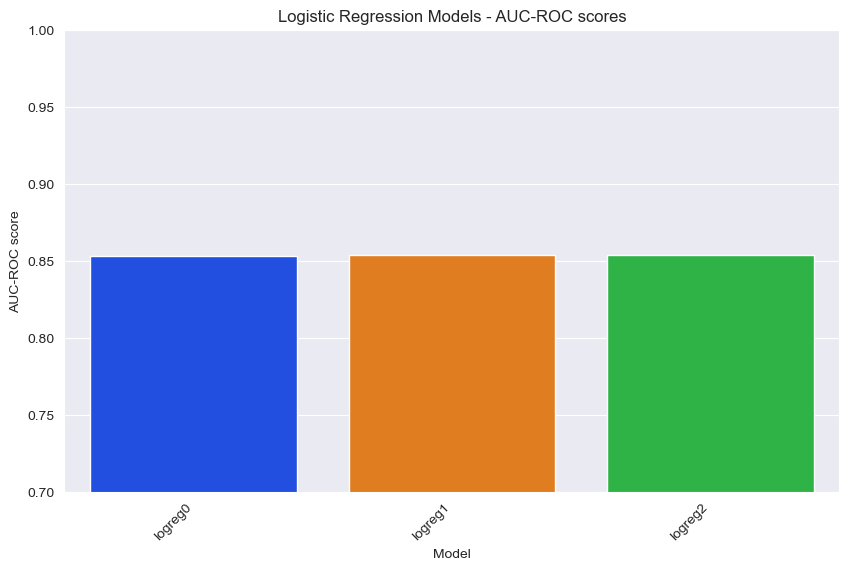

In [105]:
# Chart to show baseline performance of logistic regression models

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_logreg, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.7, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Logistic Regression Models - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

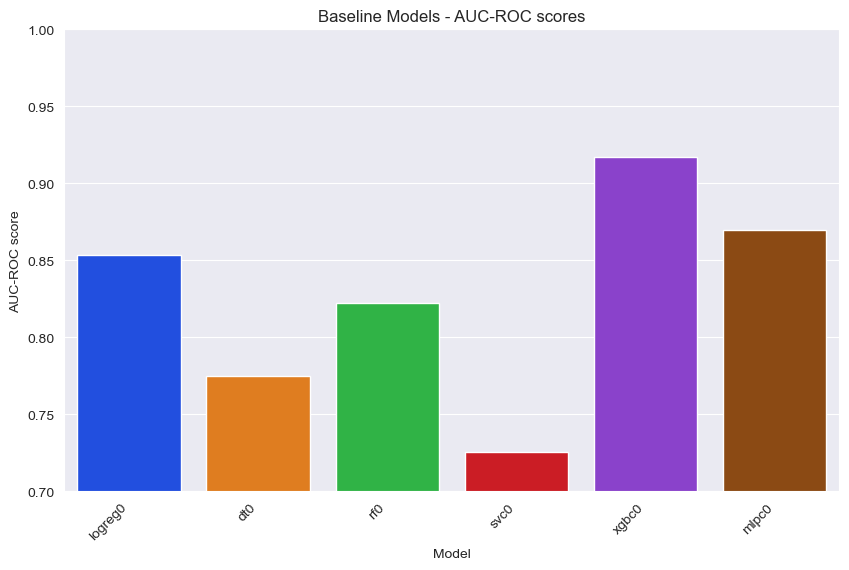

In [106]:
# Chart to show baseline (default) performance of all models applied

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_bl, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.7, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Baseline Models - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

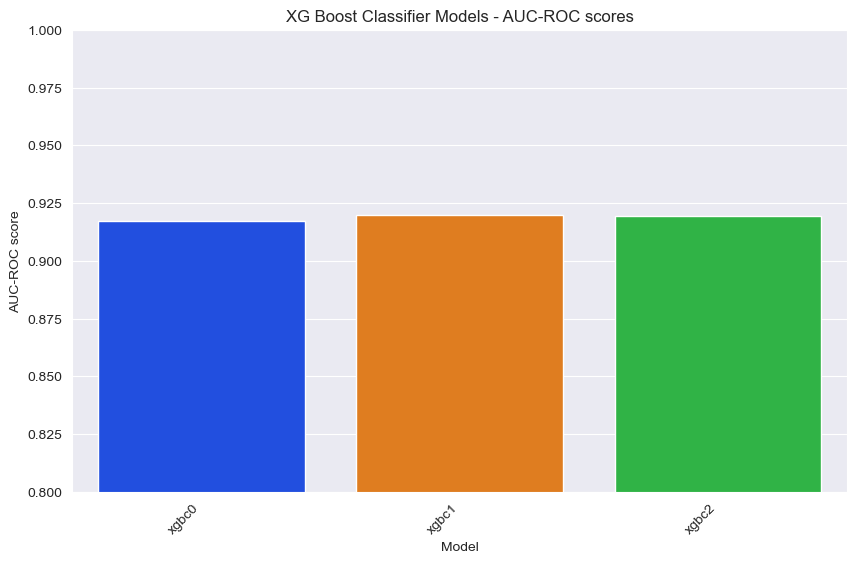

In [107]:
# Chart to show performance of XG Boost models

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_xgbc, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.8, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("XG Boost Classifier Models - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

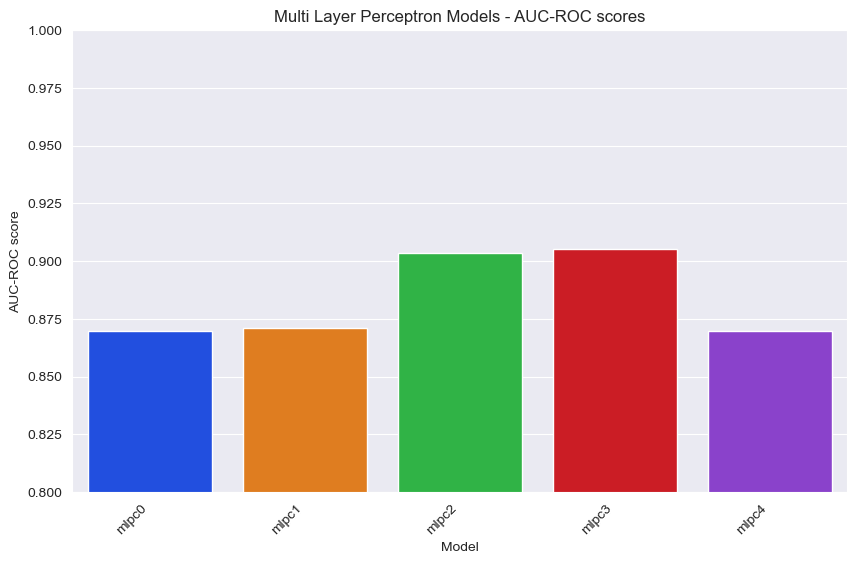

In [108]:
# Chart to show performance of Multi Layer Perceptron (MLP) models

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_mlpc, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.8, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Multi Layer Perceptron Models - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

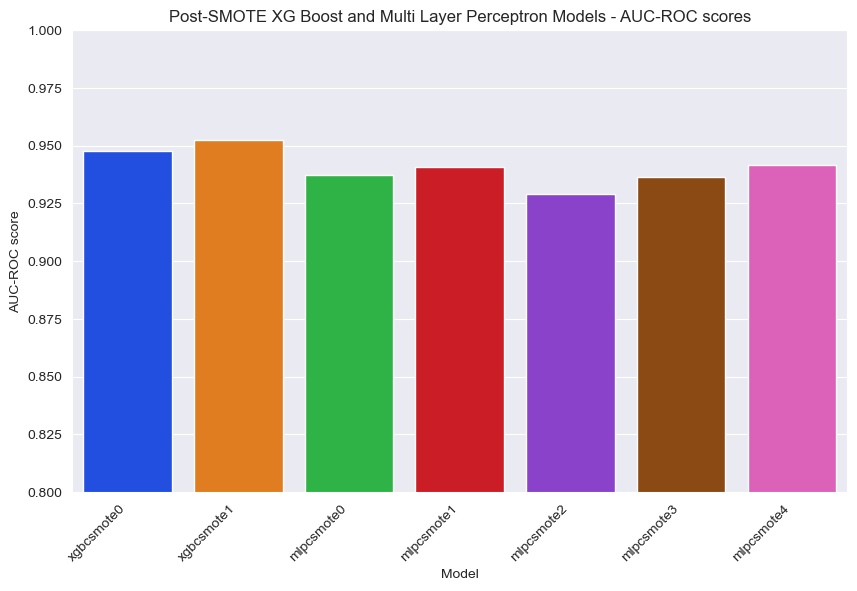

In [109]:
# Chart to show performance of XG Boost and MLP models after the application of SMOTE upscaling technique

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_smote, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.8, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Post-SMOTE XG Boost and Multi Layer Perceptron Models - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

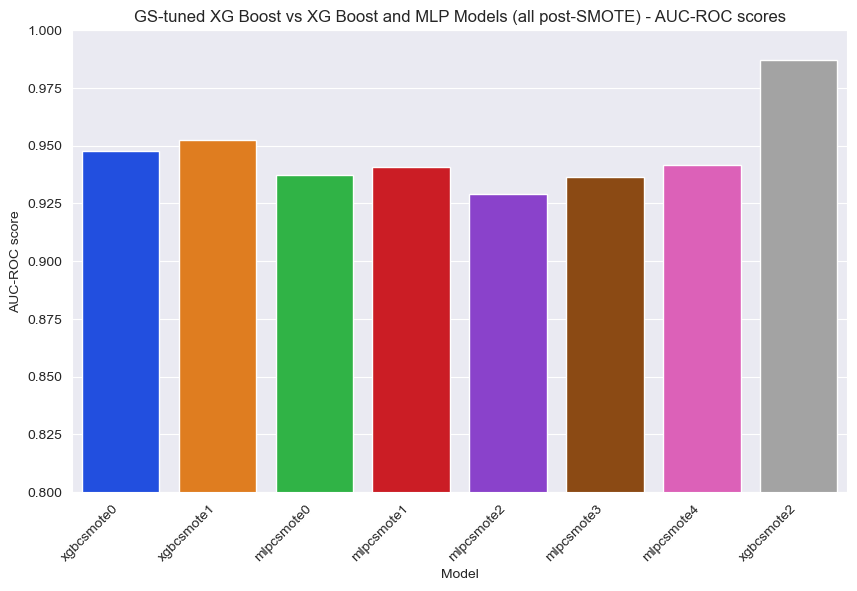

In [110]:
# Chart to show performance of XG Boost (including Grid Search fine tuned XG Boost) 
# and MLP models after the application of SMOTE upscaling technique

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=ras_scores_smote_gs, x='Model', y='AUC/ROC score', palette="bright")
chart.set_ylim(0.8, 1.0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("GS-tuned XG Boost vs XG Boost and MLP Models (all post-SMOTE) - AUC-ROC scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC score");

In [111]:
# Get feature importances
importances = xgbcsmote2.feature_importances_

# Normalize importances to sum up to 1
importances /= np.sum(importances)

# Create a dictionary to hold feature weights
feature_weights = {}

# Assign weights to features
for i, importance in enumerate(importances):
    feature_weights[f'feature_{i}'] = importance

In [112]:
feature_weights

{'feature_0': 0.00096648734,
 'feature_1': 0.0016462253,
 'feature_2': 0.0008803341,
 'feature_3': 0.0014114426,
 'feature_4': 0.018007457,
 'feature_5': 0.025518963,
 'feature_6': 0.0017665864,
 'feature_7': 0.0,
 'feature_8': 0.026672127,
 'feature_9': 0.012964095,
 'feature_10': 0.0049075554,
 'feature_11': 0.010920186,
 'feature_12': 0.03198293,
 'feature_13': 0.018560935,
 'feature_14': 0.0651454,
 'feature_15': 0.18421923,
 'feature_16': 0.07632928,
 'feature_17': 0.00587653,
 'feature_18': 0.04396579,
 'feature_19': 0.020062054,
 'feature_20': 0.0,
 'feature_21': 0.0009768398,
 'feature_22': 0.028517177,
 'feature_23': 0.17810135,
 'feature_24': 0.0,
 'feature_25': 0.0036362421,
 'feature_26': 0.005228897,
 'feature_27': 0.011888156,
 'feature_28': 0.0014712131,
 'feature_29': 0.013868509,
 'feature_30': 0.010083586,
 'feature_31': 0.0039810683,
 'feature_32': 0.0012529976,
 'feature_33': 0.0027375815,
 'feature_34': 0.046447787,
 'feature_35': 0.0017920422,
 'feature_36': 0.059

In [113]:
df_featureimp = pd.read_csv('Feature Importance3.csv')
df_featureimp

,Feature,Feature Importance
0,16 CRIME_TYPE_FRAUD,18.42
1,24 CRIME_TYPE_MISSING PERSON,17.81
2,17 CRIME_TYPE_HARRASSMENT,7.63
3,15 CRIME_TYPE_FIRE,6.52
4,37 CRIME_TYPE_VEHICLE,5.94
5,35 CRIME_TYPE_THEFT,4.65
6,19 CRIME_TYPE_LARCENY,4.40
7,38 CRIME_TYPE_VERBAL,4.13
8,13 CRIME_TYPE_DRUGS,3.20
9,23 CRIME_TYPE_MEDICAL,2.85


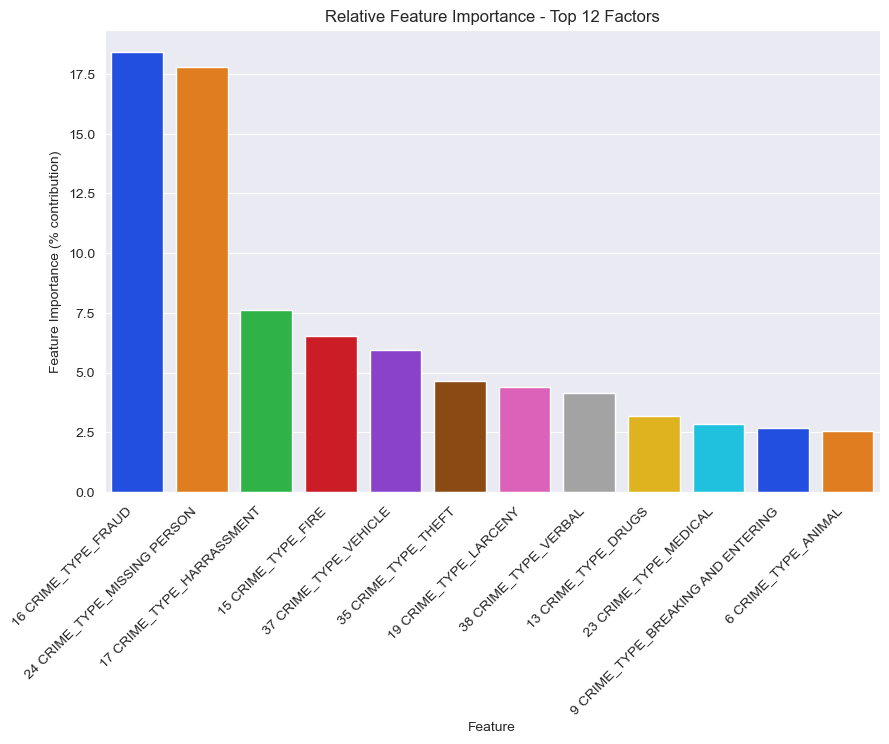

In [114]:
# Chart to show baseline (default) performance of all models applied

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

chart = sns.barplot(data=df_featureimp, x='Feature', y='Feature Importance', palette="bright")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Relative Feature Importance - Top 12 Factors")
plt.xlabel("Feature")
plt.ylabel("Feature Importance (% contribution)");

In [115]:
print(classification_report(y_test, xgbcsmote2.predict(X_test)))

# 96% accuracy score
# 97% precision score
# 96% recall score
# 96% F1 score

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    102389
           1       0.94      1.00      0.96    102603

    accuracy                           0.96    204992
   macro avg       0.97      0.96      0.96    204992
weighted avg       0.96      0.96      0.96    204992

